In [1]:
# %matplotlib
# %matplotlib inline
import numpy
import sys
import matplotlib.pyplot as plt
import time
sys.path.insert(1, '../../../../')
import gillespy2
from gillespy2 import NumPySSASolver , TauLeapingSolver, TauHybridSolver

In [2]:
class SimpleHybridModel(gillespy2.Model):
     def __init__(self, parameter_values=None, init_v=1):
            #initialize Model
            gillespy2.Model.__init__(self, name="Simple_Hybrid_Model")

            
            #Species
            A = gillespy2.Species(name='A', initial_value=50)
            V = gillespy2.Species(name='V', initial_value=init_v)

            self.add_species([A, V])
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 20.0)
            rate2 = gillespy2.Parameter(name='rate2', expression= 10.0)
#             rate_rule1 = gillespy2.RateRule(V, "cos(t)")
            self.add_parameter([rate1, rate2])
#             self.add_rate_rule(rate_rule1)
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={}, products={A:1},
                   propensity_function="rate1 * V")
            
            r2 = gillespy2.Reaction(name="r2",reactants={A:1}, products={},
                    rate=rate2)
            
            self.add_reaction([r1,r2])
            self.timespan(numpy.linspace(0,100, 101))

In [3]:
v_range = range(1, 500)
def run_test(solver, v_range):
    model = SimpleHybridModel()
    precompSolver = model.get_best_solver_algo(solver)(model)
    run_data = []
    for n in v_range:
        time_start = time.perf_counter()
        model.run(solver=precompSolver, show_labels=True)
        time_end = time.perf_counter()
        run_data.append(time_end-time_start)
    return run_data

In [4]:
timing_data = {'basic':[], 'tau':[], 'hybrid_tau':[]}
%time timing_data['SSA'] = run_test("SSA", v_range)
%time timing_data['tau_leaping'] = run_test("Tau-Leaping", v_range)
%time timing_data['hybrid_tau'] = run_test("Tau-Hybrid", v_range)
print(timing_data)

Wall time: 6.46 s
Wall time: 9.83 s
Wall time: 30 s
{'basic': [], 'tau': [], 'hybrid_tau': [0.02055730000000011, 0.06779199999999719, 0.06838000000000122, 0.06801889999999844, 0.0675612000000001, 0.015124500000002428, 0.013871999999999218, 0.014656699999999745, 0.013360999999999734, 0.013627400000000733, 0.013923499999997091, 0.06670310000000157, 0.013281600000002669, 0.06545230000000046, 0.013196199999999436, 0.013628199999999424, 0.06701959999999829, 0.015467199999999792, 0.06999199999999917, 0.0141114999999985, 0.06857180000000085, 0.06679149999999723, 0.013548100000001284, 0.013479700000001316, 0.05987899999999868, 0.06831370000000092, 0.015116299999998972, 0.0611241999999983, 0.014735500000000457, 0.0684995999999991, 0.015170499999999976, 0.014040099999999, 0.014451699999998624, 0.06874979999999908, 0.014475999999998379, 0.05996670000000037, 0.07119050000000016, 0.06818279999999888, 0.01563340000000224, 0.014787200000000666, 0.013567099999999499, 0.01332790000000017, 0.06612670000

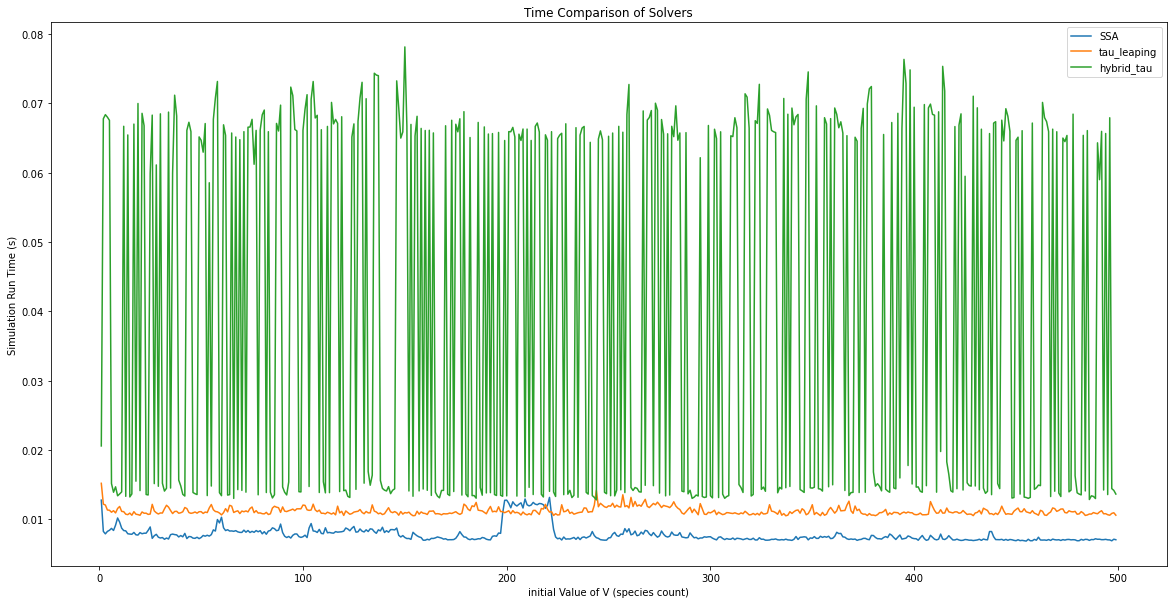

In [5]:
plt.figure(figsize=(20,10))
plt.title("Time Comparison of Solvers")
plt.xlabel("initial Value of V (species count)")
plt.ylabel("Simulation Run Time (s)")
plt.plot(v_range, timing_data['SSA'], label='SSA')
plt.plot(v_range, timing_data['tau_leaping'], label='tau_leaping')
plt.plot(v_range, timing_data['hybrid_tau'], label='hybrid_tau')
plt.legend(loc='best')
plt.savefig("TimeComparisonOfSolvers.pdf")